## How are in_demand Skills trending for Data Analysts?

### Methology
1.aggregate skill counts monthly 

2.Re_analyze based on percentage of total jobs

3.Plot the monthly skill demand

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from datasets import load_dataset
import ast
import seaborn as sns

#loading Data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#Data Cleanup 
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)




In [3]:
df_DA_US=df[(df['job_title']=='Data Analyst')&(df['job_country']=='United States')].copy()

In [4]:
df_DA_US['job_posted_month_no']=df_DA_US['job_posted_date'].dt.month

In [5]:
df_DA_US_explode=df_DA_US.explode('job_skills')

In [32]:
df_DA_US_pivot=df_DA_US_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)

df_DA_US_pivot.loc['Total']=df_DA_US_pivot.sum()
df_DA_US_pivot=df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_US_pivot=df_DA_US_pivot.drop('Total')

df_DA_US_pivot


job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


In [33]:

DA_totals=df_DA_US.groupby('job_posted_month_no').size()
DA_totals

job_posted_month_no
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [36]:
#.div method

df_DA_US_percent=df_DA_US_pivot.div(DA_totals/100,axis=0,)

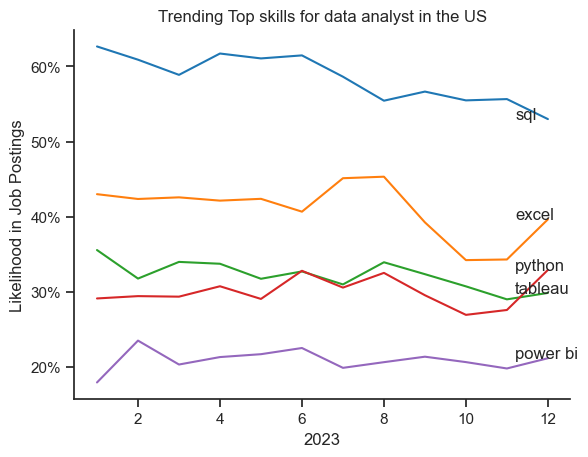

In [50]:
from matplotlib.ticker import PercentFormatter
df_plot=df_DA_US_percent.iloc[:,:5]

sns.lineplot(df_plot,dashes=False,palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
plt.title("Trending Top skills for data analyst in the US")
plt.ylabel('Likelihood in Job Postings')
plt.xlabel('2023')
plt.legend().remove()
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


for i in range(5):
         plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i])